## Reading And Adding Full dates

In [1]:
import pandas as pd

In [2]:
bhel = pd.read_csv("BHEL.NS.csv")
bse_sensex = pd.read_csv("BSE-Sensex.csv")
nse = pd.read_csv("Nse.csv")

In [3]:
bhel['Date'] = pd.to_datetime(bhel['Date'])
bse_sensex['Date'] = pd.to_datetime(bse_sensex['Date'])
nse['Date'] = pd.to_datetime(nse['Date'])

In [4]:
mask_bhel = (bhel['Date']>'2008-01-01')&(bhel['Date']<'2016-12-31')
bhel = bhel.loc[mask_bhel]
mask_bse_sensex = (bse_sensex['Date']>'2008-01-01')&(bse_sensex['Date']<'2016-12-31')
bse_sensex = bse_sensex.loc[mask_bse_sensex]
mask_nse = (nse['Date']>'2008-01-01')&(nse['Date']<'2016-12-31')
nse = nse.loc[mask_nse]

In [5]:
date = list(bhel['Date'])
bhel_close = list(bhel['Adj Close'])
bhel_volume=list(bhel['Volume'])
bse_sensex_close = list(bse_sensex['Adj Close'])
bse_sensex_volume=list(bse_sensex['Volume'])
nse_close = list(nse['Adj Close'])
nse_volume=list(nse['Volume'])

In [6]:
import datetime

dt = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2016, 12, 31)
step = datetime.timedelta(seconds = 3600*24)

Full_Dates = []

while dt < end:
    Full_Dates.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

    
Full_Dates = pd.to_datetime(Full_Dates)

In [23]:
bhel_close_new = []
bhel_volume_new = []
bse_sensex_close_new = []
bse_sensex_volume_new = []
nse_close_new = []
nse_volume_new = []
i=0
j=0
while i<len(Full_Dates):
    if j<len(date) and date[j]==Full_Dates[i]:
        bhel_close_new.append(bhel_close[j])
        bhel_volume_new.append(bhel_volume[j])
        bse_sensex_close_new.append(bse_sensex_close[j])
        bse_sensex_volume_new.append(bse_sensex_volume[j])
        nse_close_new.append(nse_close[j])
        nse_volume_new.append(nse_volume[j])
        j+=1
    else:
        if j==0:
            bhel_close_new.append(bhel_close[j])
            bhel_volume_new.append(bhel_volume[j])
            bse_sensex_close_new.append(bse_sensex_close[j])
            bse_sensex_volume_new.append(bse_sensex_volume[j])
            nse_close_new.append(nse_close[j])
            nse_volume_new.append(nse_volume[j])
        else:
            bhel_close_new.append(bhel_close[j-1])
            bhel_volume_new.append(bhel_volume[j-1])
            bse_sensex_close_new.append(bse_sensex_close[j-1])
            bse_sensex_volume_new.append(bse_sensex_volume[j-1])
            nse_close_new.append(nse_close[j-1])
            nse_volume_new.append(nse_volume[j-1])
        
    i+=1

### Preprocessing the data - Normalizing to image form

In [12]:
def preprocess(ls,const):
    out=[]
    i=0
    while i<len(ls):
        try:
            ls[i] = float(ls[i])
            out.append(ls[i])
        except ValueError:
            out.append(out[i-1])
        i+=1
    return out
            

In [13]:
import numpy as np

In [27]:
bhel_close_new = preprocess(bhel_close_new,0)
bhel_close_new = np.array(bhel_close_new)
bhel_close_new = (bhel_close_new-np.amin(bhel_close_new))*10000/(np.amax(bhel_close_new)-np.amin(bhel_close_new))
bhel_close_new = np.array(bhel_close_new,'int')

In [28]:
bhel_volume_new = preprocess(bhel_volume_new,0)
bhel_volume_new = np.array(bhel_volume_new)
bhel_volume_new = (bhel_volume_new-np.amin(bhel_volume_new))*10000/(np.amax(bhel_volume_new)-np.amin(bhel_volume_new))
bhel_volume_new = np.array(bhel_volume_new,'int')

In [29]:
bse_sensex_close_new = preprocess(bse_sensex_close_new,0)
bse_sensex_close_new = np.array(bse_sensex_close_new)
bse_sensex_close_new = (bse_sensex_close_new-np.amin(bse_sensex_close_new))*10000/(np.amax(bse_sensex_close_new)-np.amin(bse_sensex_close_new))
bse_sensex_close_new = np.array(bse_sensex_close_new,'int')

In [30]:
bse_sensex_volume_new = preprocess(bse_sensex_volume_new,0)
bse_sensex_volume_new = np.array(bse_sensex_volume_new)
bse_sensex_volume_new= (bse_sensex_volume_new-np.amin(bse_sensex_volume_new))*10000/(np.amax(bse_sensex_volume_new)-np.amin(bse_sensex_volume_new))
bse_sensex_volume_new = np.array(bse_sensex_volume_new,'int')

In [31]:
nse_close_new = preprocess(nse_close_new,0)
nse_close_new= np.array(nse_close_new)
nse_close_new = (nse_close_new-np.amin(nse_close_new))*10000/(np.amax(nse_close_new)-np.amin(nse_close_new))
nse_close_new = np.array(nse_close_new,'int')

### Preprocessing - To Binary Signal

In [18]:
def preprocess_binary(ls):
    out=[0]
    i=1
    prev=0
    while i<len(ls):
        try:
            ls[i] = float(ls[i])
            if prev<ls[i]:
                out.append(1)
            elif prev == ls[i]:
                out.append(0.5)
            else:
                out.append(0)
            prev=ls[i]
                
        except ValueError:
            out.append(0)
        i+=1
    return out

In [19]:
bhel_close_new = preprocess_binary(bhel_close_new)
bhel_volume_new = preprocess_binary(bhel_volume_new)
bse_sensex_close_new = preprocess_binary(bse_sensex_close_new)
bse_sensex_volume_new = preprocess_binary(bse_sensex_volume_new)
nse_close_new = preprocess_binary(nse_close_new)

### Making Final Frame

In [32]:
Final_Frame = pd.DataFrame(Full_Dates,columns=["Date"])
Final_Frame["BHEL-CLOSE"] = bhel_close_new
Final_Frame["BHEL-VOLUME"] = bhel_volume_new
Final_Frame["BSE-CLOSE"] = bse_sensex_close_new
Final_Frame["BSE-VOLUME"] = bse_sensex_volume_new
Final_Frame["NSE-CLOSE"] = nse_close_new
Final_Frame["NSE-VOLUME"] = nse_volume_new

In [33]:
Final_Frame

,Date,BHEL-CLOSE,BHEL-VOLUME,BSE-CLOSE,BSE-VOLUME,NSE-CLOSE,NSE-VOLUME
0,2008-01-01,8290,325,5717,913,5647,0
1,2008-01-02,8290,325,5717,913,5647,0
2,2008-01-03,8131,439,5661,913,5646,0
3,2008-01-04,8269,395,5820,821,5794,0
4,2008-01-05,8269,395,5820,821,5794,0
5,2008-01-06,8269,395,5820,821,5794,0
6,2008-01-07,8151,409,5878,774,5801,0
7,2008-01-08,8109,505,5907,1014,5815,0
8,2008-01-09,7906,649,5905,987,5790,0
9,2008-01-10,7912,871,5771,940,5612,0


In [25]:
Final_Frame

,Date,BHEL-CLOSE,BHEL-VOLUME,BSE-CLOSE,BSE-VOLUME,NSE-CLOSE,NSE-VOLUME
0,2008-01-01,350.969971,2580125,20465.300781,20600,6179.399902,0
1,2008-01-02,350.969971,2580125,20465.300781,20600,6179.399902,0
2,2008-01-03,344.220795,3486755,20345.199219,20600,6178.549805,0
3,2008-01-04,350.096191,3136075,20686.890625,18600,6274.299805,0
4,2008-01-05,350.096191,3136075,20686.890625,18600,6274.299805,0
5,2008-01-06,350.096191,3136075,20686.890625,18600,6274.299805,0
6,2008-01-07,345.073883,3249305,20812.650391,17600,6279.100098,0
7,2008-01-08,343.326416,4006310,20873.330078,22800,6287.850098,0
8,2008-01-09,334.733459,5145885,20869.779297,22200,6272.000000,0
9,2008-01-10,334.987976,6908040,20582.080078,21200,6156.950195,0


In [34]:
Final_Frame.to_csv("Feed_Data_Binary.csv")

In [34]:
del Final_Frame['Date']
del Final_Frame['NSE-VOLUME']

### Target Signals

In [26]:
import numpy as np
target_signal_binary=[]
target_signal_tertiary = []

i=1
while i<len(Final_Frame):
    if Final_Frame['BHEL-CLOSE'][i]>Final_Frame['BHEL-CLOSE'][i-1]:
        target_signal_binary.append(np.array([1,0]))
    else:
        target_signal_binary.append(np.array([0,1]))
    
    if Final_Frame['BHEL-CLOSE'][i] > Final_Frame['BHEL-CLOSE'][i-1]:
        target_signal_tertiary.append(np.array([1,0,0]))
    elif Final_Frame['BHEL-CLOSE'][i] == Final_Frame['BHEL-CLOSE'][i-1]:
        target_signal_tertiary.append(np.array([0,1,0]))
    else:
        target_signal_tertiary.append(np.array([0,0,1]))
    i+=1
target_signal_binary = np.array(target_signal_binary)  
target_signal_tertiary = np.array(target_signal_tertiary)


### Making Feeding Data

In [35]:
Feed = []

i=0
while i<len(Final_Frame)-30:
    Feed.append(np.array(Final_Frame[0:30]))
    i+=1
Feed = np.array(Feed)

In [36]:
target_signal_binary = target_signal_binary[0:3257]
target_signal_tertiary = target_signal_tertiary[0:3257]

In [37]:
def shuffle2geather(A,B,C):
    import numpy as np
    RNG_state = np.random.get_state()
    np.random.shuffle(A)
    np.random.set_state(RNG_state)
    np.random.shuffle(B)
    np.random.set_state(RNG_state)
    np.random.shuffle(C)

In [38]:
shuffle2geather(Feed,target_signal_binary,target_signal_tertiary)

In [25]:
def pickle_data(train_x, train_y2, train_y3, Name):
    import pickle
    final_list = {'train_x':train_x, 'train_y2':train_y2, 'train_y3':train_y3}
    with open(Name,'wb') as f:
        pickle.dump(final_list,f)

In [26]:
pickle_data(Feed,target_signal_binary,target_signal_tertiary,'Feed_Binary_No Negative')

In [39]:
Feed[0]

array([[8290,  325, 5717,  913, 5647],
       [8290,  325, 5717,  913, 5647],
       [8131,  439, 5661,  913, 5646],
       [8269,  395, 5820,  821, 5794],
       [8269,  395, 5820,  821, 5794],
       [8269,  395, 5820,  821, 5794],
       [8151,  409, 5878,  774, 5801],
       [8109,  505, 5907, 1014, 5815],
       [7906,  649, 5905,  987, 5790],
       [7912,  871, 5771,  940, 5612],
       [7910,  342, 5885,  802, 5679],
       [7910,  342, 5885,  802, 5679],
       [7910,  342, 5885,  802, 5679],
       [8043,  266, 5839,  738, 5690],
       [7863,  492, 5617,  857, 5485],
       [7501,  714, 5440, 1097, 5271],
       [7643,  587, 5362,  894, 5236],
       [7491,  524, 5043, 1254, 4915],
       [7491,  524, 5043, 1254, 4915],
       [7491,  524, 5043, 1254, 4915],
       [6836,  668, 4388, 1614, 4147],
       [6479, 1101, 3981, 1374, 3669],
       [6982, 1013, 4383,  977, 4139],
       [6809,  719, 4210, 1014, 3877],
       [7035,  658, 4740,  664, 4417],
       [7035,  658, 4740,

In [51]:
train_x = Feed[0:2500]
test_x = Feed[2500:]

In [52]:
train_y = target_signal_binary[0:2500]
test_y = target_signal_binary[2500:]

In [53]:
train_x.shape

(2500, 30, 5)

In [56]:
train_x = train_x.reshape([-1, 30, 5, 1])
test_x = test_x.reshape([-1, 30, 5, 1])

In [44]:
train_x = train_x.reshape([-1, 150, 1])
test_x = test_x.reshape([-1, 150,1])

In [45]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import tensorflow as tf
import os

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [46]:
LR = 1e-4
MODEL_NAME = 'tt-{}-{}.model'.format(LR,'4conv-3fc-basic-stocks')#5conv-basic


In [55]:
tf.reset_default_graph()
RNN = input_data(shape=[None, 150, 1], name='input')

RNN = tflearn.lstm(RNN, 50, return_seq=True)

RNN = tflearn.lstm(RNN, 50)

RNN = tflearn.fully_connected(RNN, 2, activation='softmax')
RNN = dropout(RNN, 0.90)

RNN = tflearn.regression(RNN, optimizer='adam', loss='categorical_crossentropy', name="output")

model = tflearn.DNN(RNN, tensorboard_verbose=1)

In [55]:
tf.reset_default_graph()
convnet = input_data(shape=[None, 30, 5,1], name='input')

convnet = conv_2d(convnet, 128, 2, activation='relu') #--- 30 x 5
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 256, 2, strides=2, activation='relu') #-----15 x 3
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu')
#convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 1024, 2, strides=2, activation='relu')
#convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 2048, activation='softmax')
convnet = dropout(convnet, 0.85)

convnet = fully_connected(convnet, 512, activation='softmax')

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_verbose=0)

In [ ]:
model.load(MODEL_NAME)

In [57]:
model.fit({'input': train_x},train_y, n_epoch=100, validation_set=({'input': test_x},test_y), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3999  | total loss: 0.64204 | time: 4.146s
| Adam | epoch: 100 | loss: 0.64204 - acc: 0.6584 -- iter: 2496/2500
Training Step: 4000  | total loss: 0.63906 | time: 5.259s
| Adam | epoch: 100 | loss: 0.63906 - acc: 0.6629 | val_loss: 0.62587 - val_acc: 0.6830 -- iter: 2500/2500
--


In [431]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\Shachi Shah\Tensorflow Tutorials\Stocks\tt-0.001-6conv-4fc-basic-stocks.model is not in all_model_checkpoint_paths. Manually adding it.


In [1]:
def makeimage_binary(d1_array):
    import numpy as np
    image=[]
    i=0
    while i<30:
        row=[]
        j=0
        while j<5:
            row.append(np.array([d1_array[i][j]*255]*3,int))
            j+=1
        image.append(np.array(row))
        i+=1
    image = np.array(image)
    return image

In [2]:
def makeimage(d1_array):
    import numpy as np
    image=[]
    i=0
    while i<30:
        row=[]
        j=0
        while j<5:
            row.append(np.array([int(d1_array[i][j]*255/10000)]*3))
            j+=1
        image.append(np.array(row))
        i+=1
    image = np.array(image)
    return image
            

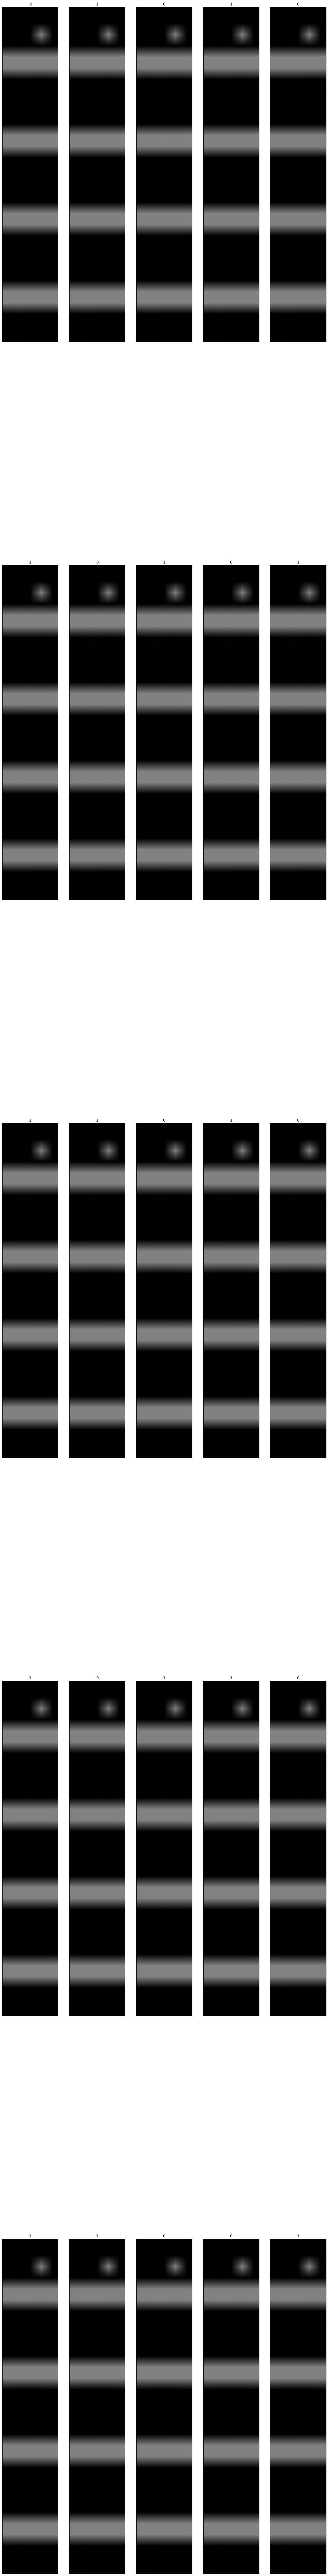

In [65]:
import matplotlib.pyplot as plt
image_counter=0

fig = plt.figure(figsize=(18,150))
while image_counter<25:
    
    Image = makeimage_binary(Feed[image_counter])

    Actual_Label = np.argmax(target_signal_binary[image_counter])
    
    y = fig.add_subplot(5,5,image_counter+1)
    y.imshow(Image)
    plt.title(Actual_Label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    image_counter+=1
plt.show() 